In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:.2f}'.format
import requests
import csv
data=pd.read_csv(r"C:\Users\merie\Desktop\advdata\Insurance\insuranceClaim.csv",delimiter=',',encoding='latin1')
print(data.head())
print (len(data))

In [ ]:
#we need to split the data
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

In [ ]:
print(len(train_set))
print(len(test_set))


In [ ]:
data = train_set.copy()
print (data)

In [ ]:
print(data.info())

In [ ]:
print(data.describe())

In [ ]:
# from data.info() we can notice that charge is defined as object because it is considered as String in csv file because 
#the proesence of ","in the numbers 
data['charges'] = data['charges'].str.replace(',', '')
print(data['charges'])

In [ ]:
# after eliminating "," from charge feature,now we proceed to change the String to the FLoat errors='coerce'
data['charges'] = pd.to_numeric(data['charges'],errors ='coerce')
#data['charges']=pd.set_option('float_format')

print(data['charges'])


In [ ]:
print(data['charges'].sum())

In [ ]:
data.plot(kind="scatter", x="region", y="charges")

In [ ]:
#A histogram for each numerical attribute
data.hist(bins=50, figsize=(20,15))
plt.show()


In [ ]:
data.region[data.region == 0] = 'northeast'
data.region[data.region == 1] = 'northwest'
data.region[data.region == 2] = 'southeast'
data.region[data.region == 3] = 'southwest'
print(data) 


In [ ]:
#we need to check if we have a null value in each feature
print(data["age"].isnull().sum())
print(data["sex"].isnull().sum())
print(data["bmi"].isnull().sum())
print(data["steps"].isnull().sum())
print(data["children"].isnull().sum())
print(data["smoker"].isnull().sum())
print(data["region"].isnull().sum())
print(data["charges"].isnull().sum())
print(data["insuranceclaim"].isnull().sum())
print(data["DateClaim"].isnull().sum())



In [ ]:
corr_matrix = data.corr()
print (data.corr())
corr_matrix["charges"].sort_values(ascending=False)


In [ ]:
# we can notice the we have 3 feature which have a null value , two of them have only one value missing that means 
#most of data are present and one feature which is dateclaim has 1256 null on1336, we can only drop this feature 
#we need to replace the null with 0
#data.dropna(subset=['charges'])
#median = data['charges'].median()# option 1
#data.dropna(subset=['bmi'])
#median = data['bmi'].median()# option 1
#data.dropna(subset=['steps'])
#median = data['steps'].median()# option 1

#data["charges"] = data["charges"].replace(np.nan, 0)
#data["bmi"] = data["bmi"].replace(np.nan, 0)


In [ ]:
data_num.median().values

In [ ]:
 #import numpy as np
 from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values = np.nan, strategy="median")
data_num = data.drop(['region','DateClaim'], axis=1)

X = imputer.fit_transform(data_num)
#X = imputer.transform(data_num)


In [ ]:
#convert the numpy array to a Dataframe
data_tr1 = pd.DataFrame(X,columns=['age',     'bmi',   'steps',  'children',  'charges','sex','insuranceclaim','smoker' ] )
print(data_tr1.head())

In [ ]:
#we check if the NAN was replaced by median
print(data_tr1["bmi"].isnull().sum())
print(data_tr1["charges"].isnull().sum())


In [71]:
#we need to change region name to a number 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data_cat = data["region"]
data_cat_encoded = le.fit_transform(data_cat)
data_cat_encoded

array([1, 0, 2, ..., 0, 3, 3])

In [72]:
encoder.classes_

NameError: name 'encoder' is not defined

In [73]:
#unisng the inverse code to understand how the data was labled 
list(le.inverse_transform([0,1, 2, 3]))


['northeast', 'northwest', 'southeast', 'southwest']

In [74]:
data_tr2 = pd.DataFrame(data_cat_encoded,columns=['region'] )

print (data_tr2)

      region
0          1
1          0
2          2
3          2
4          1
...      ...
1065       0
1066       2
1067       0
1068       3
1069       3

[1070 rows x 1 columns]


In [75]:
data_prepared=pd.concat([ data_tr1,data_tr2],axis=1)
print (data_prepared)

       age  bmi  steps  children  charges  sex  insuranceclaim  smoker  region
0    46.00 0.00  19.95   8005.00     2.00 0.00         9193.84    0.00       1
1    47.00 0.00  24.32   8007.00     0.00 0.00         8534.67    0.00       0
2    52.00 0.00  24.86   5008.00     0.00 0.00        27117.99    0.00       2
3    39.00 0.00  34.32   3004.00     5.00 0.00         8596.83    0.00       2
4    54.00 0.00  21.47   8000.00     3.00 0.00        12475.35    0.00       1
...    ...  ...    ...       ...      ...  ...             ...     ...     ...
1065 18.00 0.00  31.35   3010.00     4.00 0.00         4561.19    0.00       0
1066 39.00 0.00  23.87  10000.00     5.00 0.00         8582.30    0.00       2
1067 58.00 1.00  25.18   5010.00     0.00 0.00        11931.13    0.00       0
1068 37.00 0.00  47.60   4009.00     2.00 1.00        46113.51    1.00       3
1069 55.00 1.00  29.90   5004.00     0.00 0.00        10214.64    1.00       3

[1070 rows x 9 columns]


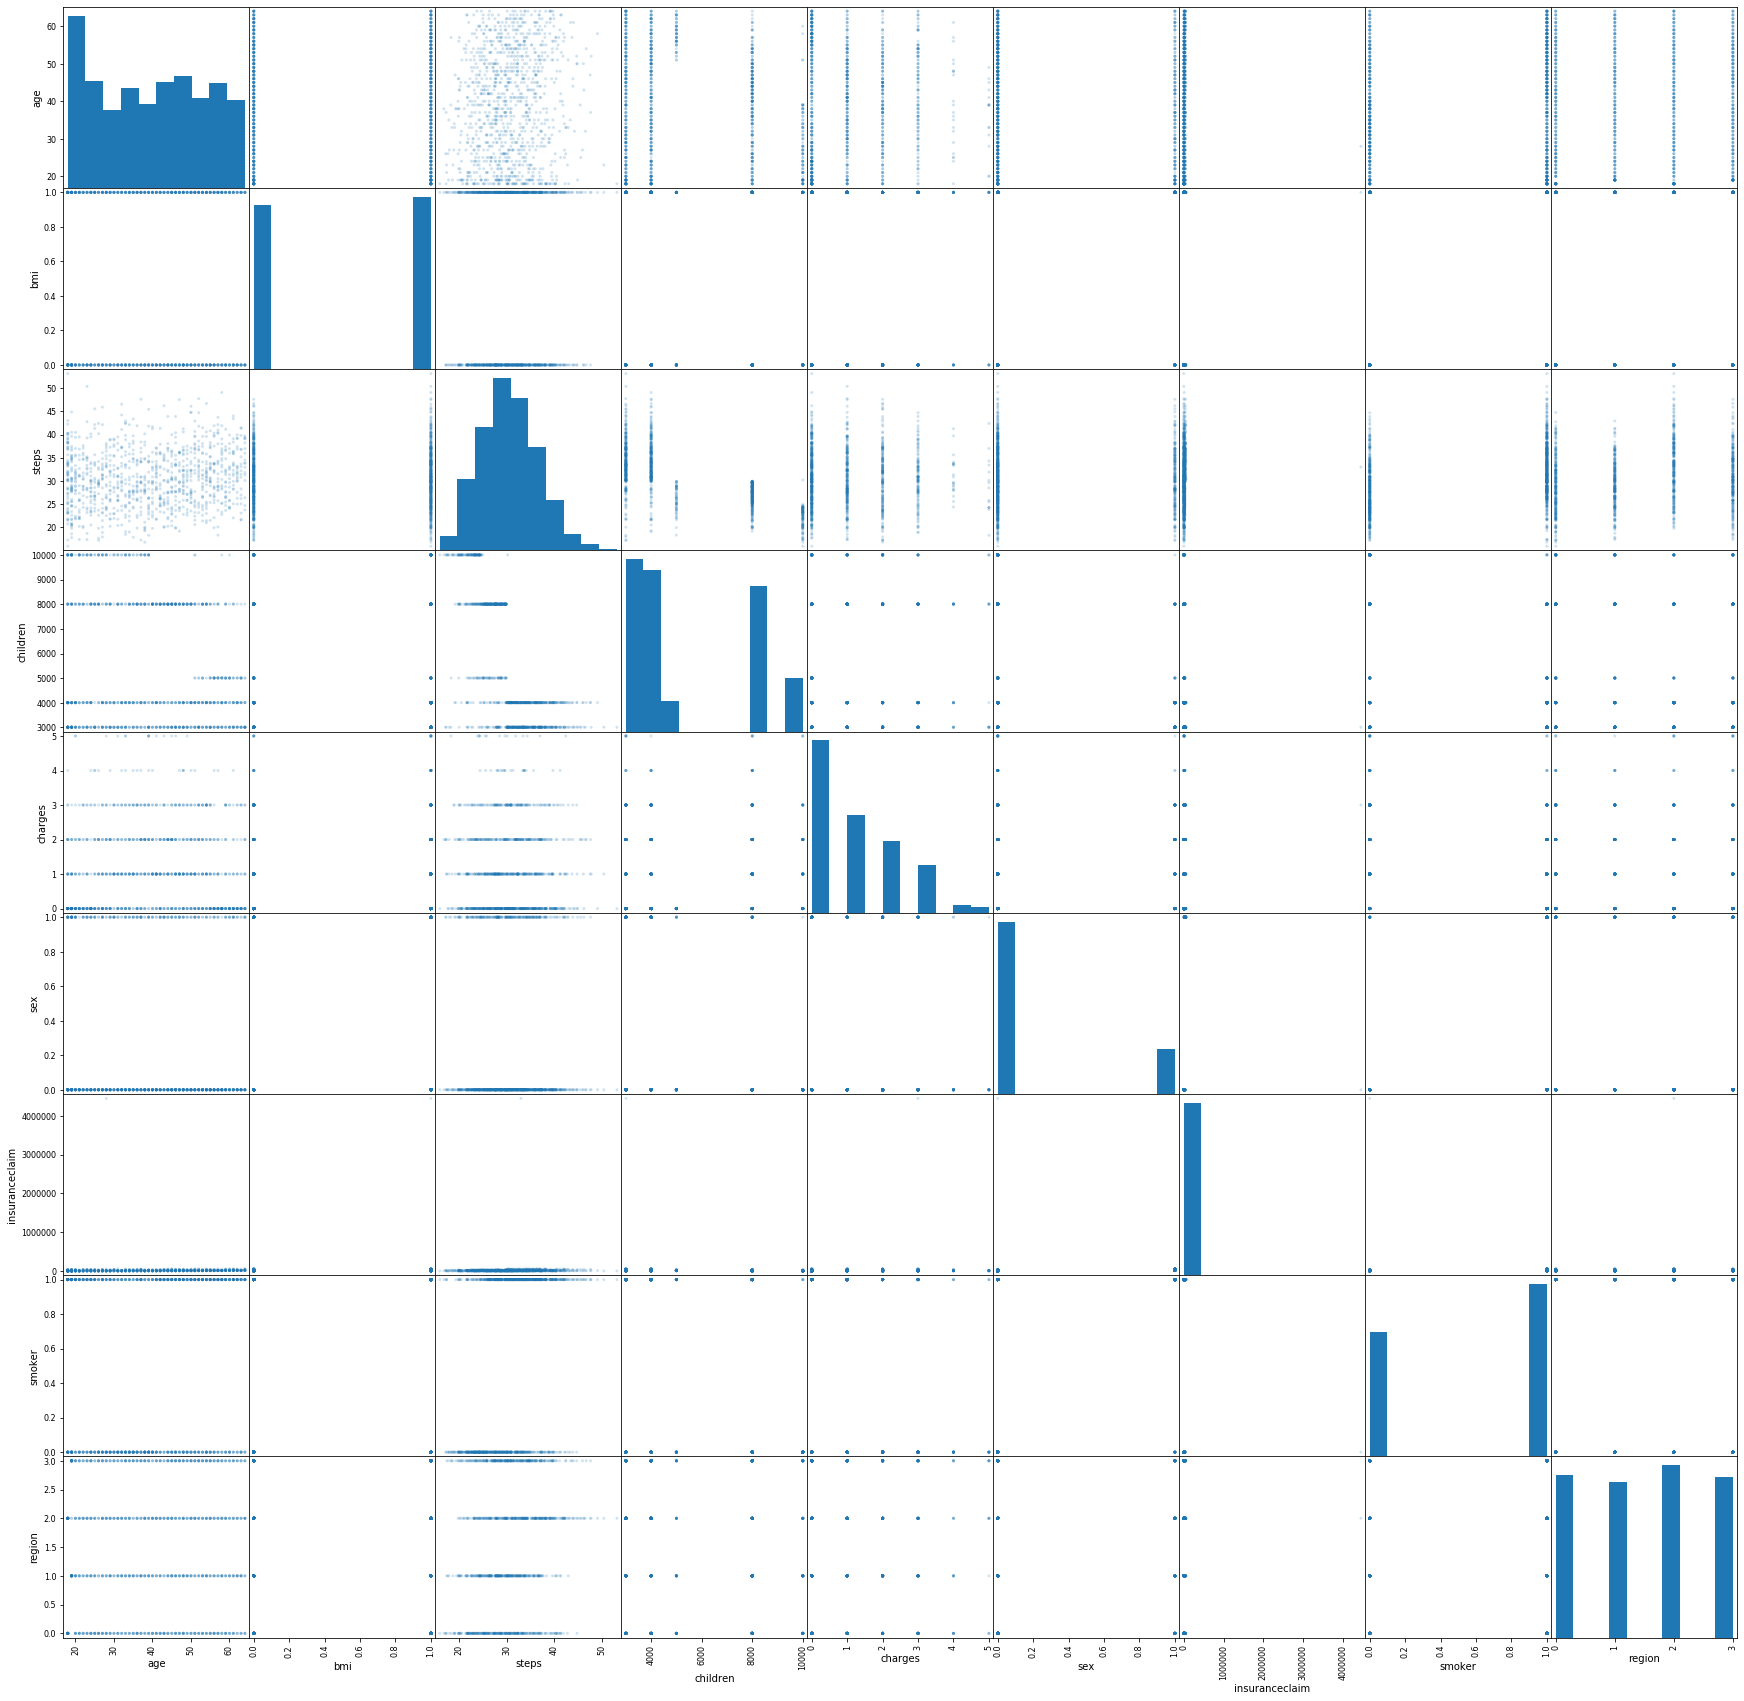

In [76]:
from pandas.plotting import scatter_matrix

pd.plotting.scatter_matrix(data_prepared, alpha=0.2, figsize=(30, 30))
plt.show()


C:\Users\merie\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017DBF8EC888>,
      dtype=object)

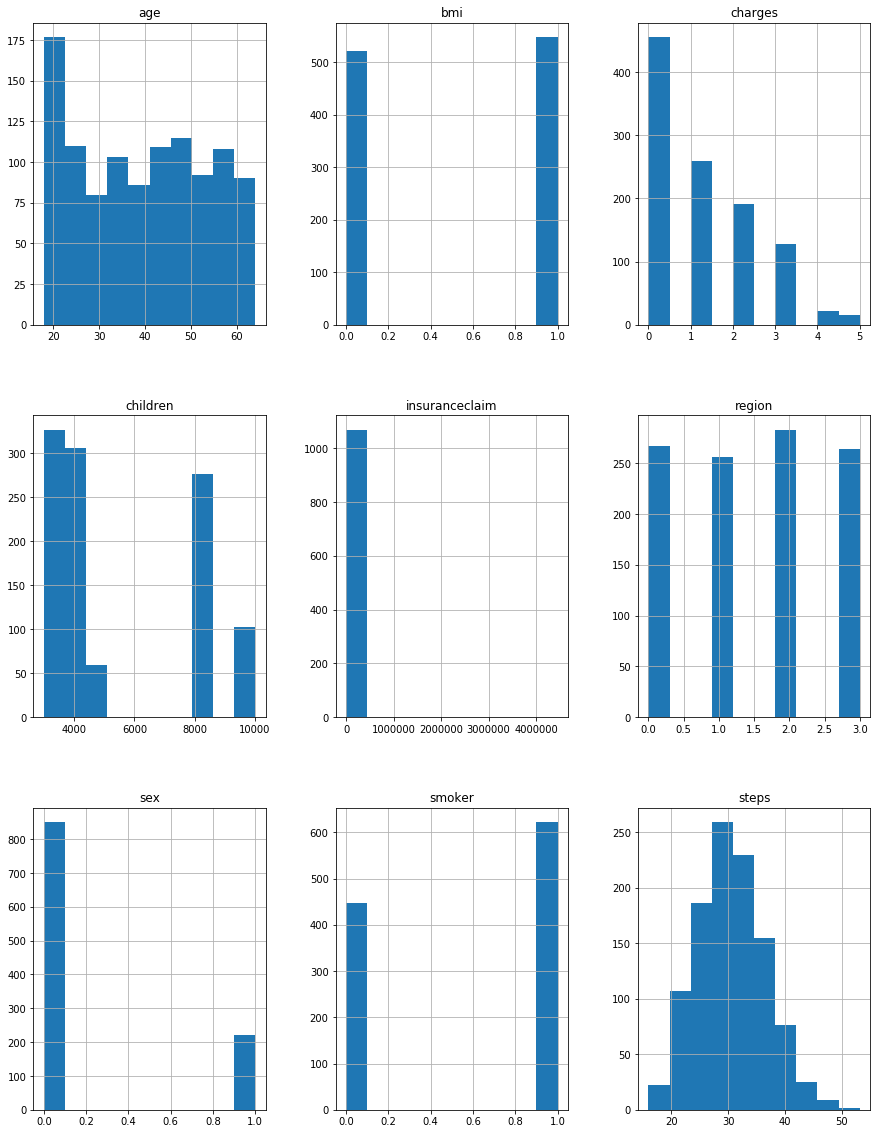

In [77]:
   fig = plt.figure(figsize = (15,20))
   ax = fig.gca()
   data_prepared.hist(ax = ax)


In [ ]:
data_prepared["charges_log"] = np.log(data_prepared["charges"])
data_prepared["charges_sqrt"] = np.sqrt(data_prepared["charges"])
data_prepared["charges_cbrt"] = np.cbrt(data_prepared["charges"])
data_prepared["charges_exp"] = np.exp(data_prepared["charges"])
data_prepared["steps_log"] = np.log(data_prepared["steps"])
data_prepared["steps_sqrt"] = np.sqrt(data_prepared["steps"])
data_prepared["steps_cbrt"] = np.cbrt(data_prepared["steps"])
data_prepared["steps_exp"] = np.exp(data_prepared["steps"])

print (data)


In [ ]:
from pandas.plotting import scatter_matrix

pd.plotting.scatter_matrix(data_prepared)
plt.show()


In [ ]:
   fig = plt.figure(figsize = (15,20))
   ax = fig.gca()
   data_prepared.hist(ax = ax)
